<a href="https://colab.research.google.com/github/akhanna24/ApexSentimentAnalysis/blob/main/ApexClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [9]:
%pip install bertopic sentence-transformers

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [11]:
df = pd.read_csv("/content/drive/MyDrive/Apex_Legends_Steam_Reviews.csv")
df.head()

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,157354180,english,very good,2024-02-01 20:07:07,True,0,0,False,False,False,0,2,3679,291,3667,2024-02-01 20:18:45
1,157354070,english,why are gay !!!,2024-02-01 20:05:35,False,0,0,False,False,False,0,1,42420,410,42420,2024-02-01 01:34:33
2,157353743,english,"good game, play it",2024-02-01 19:59:42,True,0,0,False,False,False,0,10,2867,491,2836,2024-02-01 20:30:28
3,157352109,english,"DO NOT PLAY THIS GAME ITS A DOG SHIT, EA CANT ...",2024-02-01 19:32:40,False,0,0,False,False,False,9,11,1623,150,1559,2024-02-01 20:41:24
4,157351840,english,nigger\n,2024-02-01 19:24:26,True,0,0,False,False,False,0,1,488,262,439,2024-02-01 20:13:18


In [12]:
#Cleaning Data
#remove special characters from reviews
df["review"] = df["review"].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# Fill NaN values with empty strings before applying sentiment analysis
if df["review"].isnull().any():
    df.fillna({"review":""}, inplace=True)



In [13]:
from datetime import datetime

In [14]:
df["created"] = pd.to_datetime(df["created"]).dt.normalize()
df.tail()

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
71310,129545870,english,stupid game,2022-12-28,False,1,0,False,False,False,42,1,41030,731,9818,2024-01-31 20:48:34
71311,129545713,english,its free,2022-12-28,True,0,0,False,False,False,0,11,1164,0,735,2023-01-15 02:06:16
71312,129544748,english,good times,2022-12-28,True,0,0,False,False,False,0,5,33148,0,18922,2023-10-29 19:36:30
71313,129544646,english,They ruined this game a long time ago,2022-12-28,False,1,0,False,False,False,73,30,817,0,815,2023-11-22 01:50:57
71314,129543409,english,it gud for pew pew,2022-12-28,True,1,0,False,True,False,0,4,36912,0,23258,2023-12-09 01:24:07


In [15]:
#Split Data Into Seasons
seasons = {
    "Preseason": (datetime(2019, 2, 4),   datetime(2019, 3, 19)),
    "Season 1": (datetime(2019, 3, 19), datetime(2019, 6, 18)),
    "Season 2": (datetime(2019, 7, 2), datetime(2019, 10, 1)),
    "Season 3": (datetime(2019, 10, 1), datetime(2020, 2, 4)),
    "Season 4": (datetime(2020, 2, 4), datetime(2020, 5, 12)),
    "Season 5": (datetime(2020, 5, 12), datetime(2020, 8, 18)),
    "Season 6": (datetime(2020, 8, 18), datetime(2020, 11, 4)),
    "Season 7": (datetime(2020, 11, 4), datetime(2021, 2, 2)),
    "Season 8": (datetime(2021, 2, 2), datetime(2021, 5, 4)),
    "Season 9": (datetime(2021, 5, 4), datetime(2021, 8, 3)),
    "Season 10": (datetime(2021, 8, 3), datetime(2021, 11, 2)),
    "Season 11": (datetime(2021, 11, 2), datetime(2022, 2, 8)),
    "Season 12": (datetime(2022, 2, 8), datetime(2022, 5, 10)),
    "Season 13": (datetime(2022, 5, 10), datetime(2022, 8, 9)),
    "Season 14": (datetime(2022, 8, 9), datetime(2022, 11, 1)),
    "Season 15": (datetime(2022, 11, 1), datetime(2023, 2, 14)),
    "Season 16": (datetime(2023, 2, 14), datetime(2023, 5, 9)),
    "Season 17": (datetime(2023, 5, 9), datetime(2023, 8, 8)),
    "Season 18": (datetime(2023, 8, 8), datetime(2023, 10, 31)),
    "Season 19": (datetime(2023, 10, 31), datetime(2024, 2, 13)),
    "Season 20": (datetime(2024, 2, 13), datetime(2024, 5, 6)),
    "Season 21": (datetime(2024, 5, 7), datetime(2024, 8, 6)),
    "Season 22": (datetime(2024, 8, 6), datetime(2024, 11, 5)),
    "Season 23": (datetime(2024, 11, 5), datetime(2025, 2, 11)),
    "Season 24": (datetime(2025, 2, 11), datetime(2025, 5, 6)),
    "Season 25": (datetime(2025, 5, 6), datetime(2025, 7, 5)),
}

<Axes: title={'center': 'Votes Up or Down'}, xlabel='voted_up'>

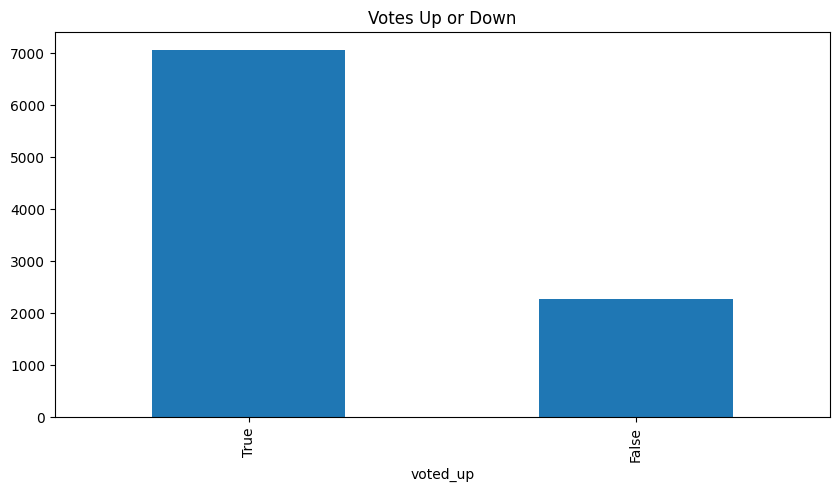

In [16]:
#Data Starts at Season 15
start, end = seasons["Season 15"]
s15_mask = (df['created'] >= start) & (df['created'] <= end)
df_s15 = df.loc[s15_mask]
df_s15["voted_up"].value_counts().plot(kind= "bar",
          title = "Votes Up or Down",
          figsize = (10,5))

<Axes: title={'center': 'Votes Up or Down'}, xlabel='voted_up'>

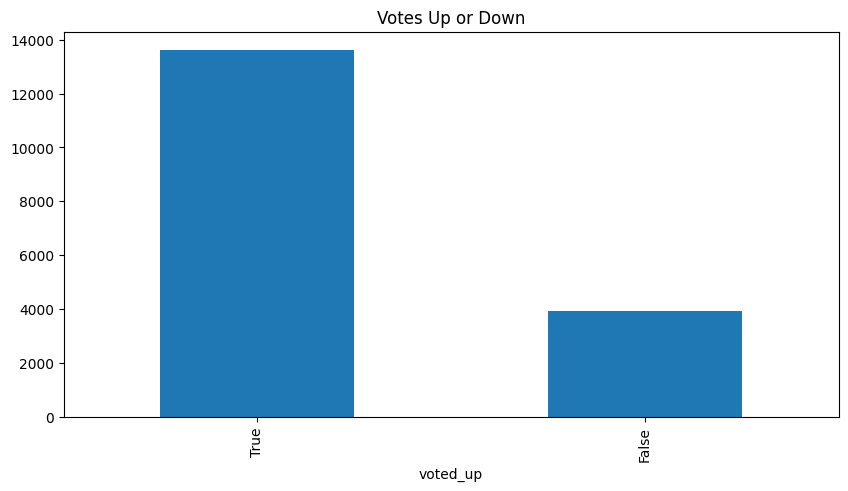

In [17]:
start, end = seasons["Season 16"]
s16_mask = (df['created'] >= start) & (df['created'] <= end)
df_s16 = df.loc[s16_mask]
df_s16.tail()
df_s16["voted_up"].value_counts().plot(kind= "bar",
          title = "Votes Up or Down",
          figsize = (10,5))

<Axes: title={'center': 'Votes Up or Down'}, xlabel='voted_up'>

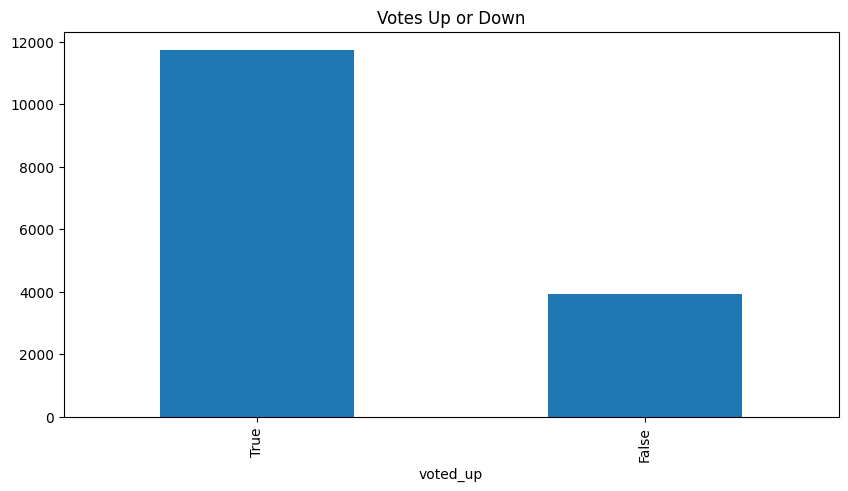

In [18]:
start, end = seasons["Season 17"]
s17_mask = (df['created'] >= start) & (df['created'] <= end)
df_s17 = df.loc[s17_mask]
df_s17.tail()
df_s17["voted_up"].value_counts().plot(kind= "bar",
          title = "Votes Up or Down",
          figsize = (10,5))

<Axes: title={'center': 'Votes Up or Down'}, xlabel='voted_up'>

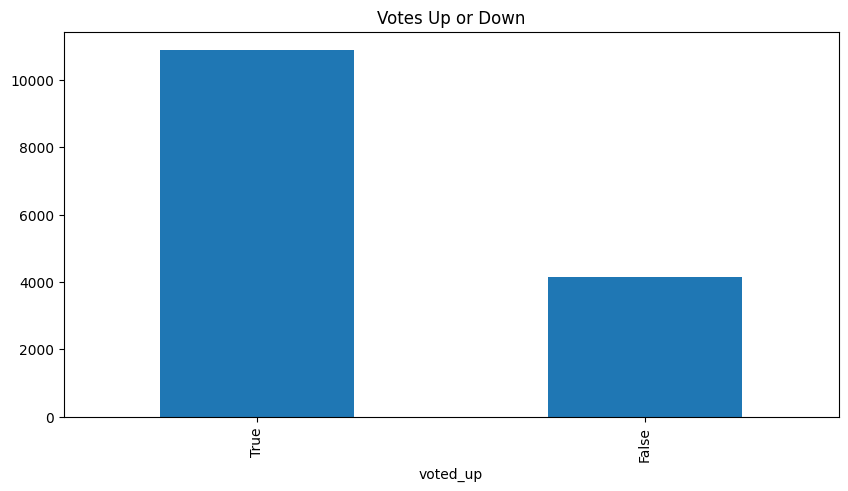

In [19]:
start, end = seasons["Season 18"]
s18_mask = (df['created'] >= start) & (df['created'] <= end)
df_s18 = df.loc[s18_mask]
df_s18.tail()
df_s18["voted_up"].value_counts().plot(kind= "bar",
          title = "Votes Up or Down",
          figsize = (10,5))

<Axes: title={'center': 'Votes Up or Down'}, xlabel='voted_up'>

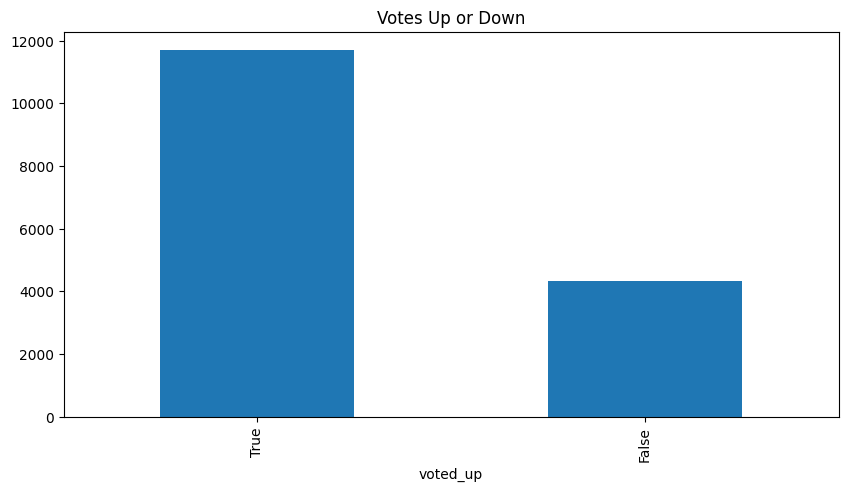

In [20]:
start, end = seasons["Season 19"]
s19_mask = (df['created'] >= start) & (df['created'] <= end)
df_s19 = df.loc[s19_mask]
df_s19.head()
#Data Ends at Season 19
df_s19["voted_up"].value_counts().plot(kind= "bar",
          title = "Votes Up or Down",
          figsize = (10,5))

# Clustering


In [21]:
df_s15.head()

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
61998,132862276,english,g,2023-02-14,True,0,0,False,False,False,21,2,37562,1232,1925,2024-02-01 21:04:04
61999,132862220,english,Can be highly competitive or casual with multi...,2023-02-14,True,0,0,False,False,False,0,1,15951,0,4298,2023-07-14 23:38:25
62000,132862134,english,Awesome game have a blast playing w friends,2023-02-14,True,0,0,False,True,False,0,5,14937,473,7636,2024-01-21 22:55:02
62001,132862133,english,but takes to much space\n,2023-02-14,True,0,0,False,False,False,0,1,2584,0,2584,2023-02-13 01:28:05
62002,132861925,english,trash lol,2023-02-14,False,0,0,False,False,False,0,9,953,0,754,2023-02-16 00:10:48


In [23]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [24]:
topic_model = BERTopic(
    embedding_model=embedding_model,
    verbose=True,
    min_topic_size=50   # merge small clusters
)

In [26]:
reviews = df["review"].tolist()

In [27]:
topics, probs = topic_model.fit_transform(reviews)

# Store topic assignments
df["topic"] = topics


2025-09-16 00:42:31,165 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/2229 [00:00<?, ?it/s]

2025-09-16 01:00:21,657 - BERTopic - Embedding - Completed ✓
2025-09-16 01:00:21,659 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-16 01:04:56,725 - BERTopic - Dimensionality - Completed ✓
2025-09-16 01:04:56,729 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-16 01:05:16,954 - BERTopic - Cluster - Completed ✓
2025-09-16 01:05:16,992 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-16 01:05:19,201 - BERTopic - Representation - Completed ✓


# Sentiment Analysis

In [28]:
from transformers import pipeline

In [29]:
sentiment_model = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment"
)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
#Get Sentiments for Batches

In [30]:
sentiments = []
batch_size = 32
for start in range(0, len(reviews), batch_size):
    chunk = reviews[start:start+batch_size]
    results = sentiment_model(chunk, truncation=True, max_length=512)
    sentiments.extend([r["label"] for r in results])

df["sentiment"] = sentiments

In [ ]:
#Sentiment Summary per Topic

In [34]:
timestamps = df["created"].tolist()

In [31]:
sent_summary = (
    df.groupby("topic")["sentiment"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .sort_index()
)
sent_summary.head()

sentiment,LABEL_0,LABEL_1,LABEL_2
topic,,,
-1,0.339837,0.377846,0.282317
0,0.000000,1.000000,0.000000
1,0.115356,0.076399,0.808245
2,0.000552,0.007174,0.992274
3,0.000000,0.946040,0.053960


In [35]:
topics_over_time = topic_model.topics_over_time(
    reviews, timestamps, nr_bins=20
)

20it [00:34,  1.71s/it]


In [36]:
topic_model.visualize_topics_over_time(topics_over_time)

In [37]:
import os

In [38]:
# Create a folder for visualizations
os.makedirs("visualizations", exist_ok=True)

# Save topic overview (scatterplot of topics)
fig_overview = topic_model.visualize_topics()
fig_overview.write_html("visualizations/topic_overview.html")

# Save topics over time
fig_trends = topic_model.visualize_topics_over_time(topics_over_time)
fig_trends.write_html("visualizations/topic_trends.html")

In [40]:
from google.colab import files
files.download("visualizations/topic_overview.html")
files.download("visualizations/topic_trends.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>